---
# 4. Recomendador basado en Count Vectorizer

<div style="text-align: justify;">

A continuación, vamos a construir un recomendador que utiliza el análisis de la columna "genre" del dataset para sugerir libros temáticamente similares.

El principio básico de este recomendador es que se asume que los libros comparten similitud temática si tienen géneros o categorías similares. Para lograr esto, primero transformamos el contenido de la columna "genre" en una representación numérica utilizando `CountVectorizer`. Este proceso convierte cada texto en un vector, en el que cada elemento refleja la frecuencia de una palabra. Así, cada libro se representa como un conjunto de características derivadas de su descripción de género.

Una vez que contamos con estos vectores, calculamos la similitud coseno entre todos los libros. La similitud coseno mide el ángulo entre dos vectores y, en este contexto, nos indica qué tan parecidos son dos libros basándonos en la presencia y frecuencia de sus palabras clave en la columna "genre". Cuanto mayor sea este valor, mayor será la similitud entre los libros.

Para facilitar el proceso de búsqueda, se reinicia el índice del DataFrame y se crea una serie que asocia cada título con su índice. Esto permite que, al ingresar un título, podamos localizar rápidamente su vector y comparar su similitud con los demás libros. La función `get_recommendations` toma un título, encuentra su posición en el dataset, y devuelve los 10 libros con los valores de similitud coseno más altos, descartando el propio libro consultado.

Además, se utiliza `TruncatedSVD` para reducir la dimensionalidad de la matriz de conteo a tres dimensiones, lo que permite visualizar en un gráfico 3D cómo se agrupan los libros según sus géneros. Esta representación visual refuerza la idea de que los libros recomendados comparten características temáticas similares.

En resumen, este recomendador se basa en la idea de que los libros se pueden comparar y relacionar a partir de sus descripciones de género. Al transformar el texto en vectores de frecuencia y calcular la similitud entre ellos, podemos sugerir de forma efectiva aquellos libros que son temáticamente afines, ofreciendo recomendaciones fundamentadas en similitudes cuantitativas.

</div>

In [4]:
import pandas as pd

In [5]:

dataset = pd.read_csv('datasets/clean_description_english.csv')
dataset

,author,desc,genre,rating,reviews,title,totalratings,idioma,clean_description
0,Helen Fremont,"""To this day, I don't even know what my mother...","Autobiography,Memoir,Nonfiction,World War II,H...",4.00,328,After Long Silence,2898,en,"To this day, I don't even know what my mother'..."
1,Christopher Morley,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",4.03,1214,Parnassus on Wheels,6107,en,"Roger Mifflin is part pixie, part sage, part n..."
2,Robert J. Shiller,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",3.98,275,Irrational Exuberance,7019,en,As Robert Shillers new 2009 preface to his pre...
3,Joseph Staten,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",3.98,271,Halo: Contact Harvest,8033,en,"This is how it began...,It is the year 2524. H..."
4,Richard Wiseman,"Is luck just fate, ,or can you change it? ,A g...","Psychology,Nonfiction,Self Help,Science,Self H...",3.82,146,"The Luck Factor: Changing Your Luck, Changing ...",1301,en,"Is luck just fate, ,or can you change it ,A gr..."
...,...,...,...,...,...,...,...,...,...
17447,Robert Jay Lifton,Nazi doctors did more than conduct bizarre exp...,"History,Nonfiction,Psychology,World War II,Hol...",4.10,118,The Nazi Doctors: Medical Killing and the Psyc...,3336,en,Nazi doctors did more than conduct bizarre exp...
17448,Priscilla Glenn,Ever since the one time Andie Weber threw caut...,"New Adult,Romance,Romance,Contemporary Romance...",3.90,450,Emancipating Andie,3974,en,Ever since the one time Andie Weber threw caut...
17449,Amber Kell,"Book one in The Thresl Chronicles Series,When ...","Romance,M M Romance,Science Fiction,Paranormal...",3.90,140,Soldier Mine,1770,en,"Book one in The Thresl Chronicles Series,When ..."
17450,Melissa Lucashenko,A darkly funny novel of romantic love and cult...,"Fiction,Cultural,Australia,Literary Fiction,Co...",3.93,164,Mullumbimby,1257,en,A darkly funny novel of romantic love and cult...


Para construir el recomendador, vamos a seguir los siguientes pasos:

1. **Inicialización del CountVectorizer:**  
   Utilizamos `CountVectorizer` con stop words en inglés para convertir los textos en vectores de conteo, eliminando palabras comunes que aporten poca información.

2. **Limpieza de Datos en la Columna "genre":**  
   Rellenamos los valores faltantes en la columna `genre` del DataFrame `dataset` con cadenas vacías para evitar errores durante la transformación.

3. **Transformación a Matriz de Conteo:**  
   Aplicamos `fit_transform` sobre la columna `genre` para crear `count_matrix`, una representación matricial en la que cada fila corresponde a un documento y cada columna a una palabra, con valores que indican la frecuencia de aparición.

4. **Verificación de la Dimensión:**  
   Finalmente, usamos `count_matrix.shape` para visualizar la dimensión de la matriz resultante, lo que nos permite confirmar el tamaño del conjunto de datos procesado.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
dataset['genre'] = dataset['genre'].fillna('')
count_matrix = count.fit_transform(dataset['genre'])

count_matrix.shape

(17452, 854)


1. **Importación de la Función:**  
   Importamos `cosine_similarity` desde `sklearn.metrics.pairwise` para medir la similitud entre los vectores.

2. **Cálculo de la Matriz de Similitud Coseno:**  
   Aplicamos `cosine_similarity` sobre la matriz de conteos (`count_matrix`), generando una matriz que nos muestra la similitud entre cada par de documentos basada en la frecuencia de palabras en la columna "genre".


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
#computing the Cosine Similarity matrix based on the count matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)


1. **Reinicio del Índice del DataFrame:**  
   Nosotros creamos un nuevo DataFrame `df3` a partir de `dataset` utilizando `reset_index()`, lo que nos permite tener un índice secuencial limpio.

2. **Creación de la Serie de Índices:**  
   Generamos una serie `indices` donde las etiquetas son los títulos de los libros y los valores son los índices correspondientes en `df3`. Esto facilita la referencia y recuperación de documentos según su título.


In [8]:
df3 = dataset.reset_index()
indices = pd.Series(df3.index, index=df3['title'])

**Función `get_recommendations`:**  
   - Tomamos como entrada un título y la matriz de similitud coseno (`cosine_sim`).
   - Buscamos el índice del documento asociado al título usando la serie `indices`.
   - Calculamos la similitud entre el documento de entrada y el resto, creando una lista de tuplas con índices y puntajes.
   - Ordenamos la lista en orden descendente según la similitud y excluimos el primer elemento (que es el documento mismo).
   - Seleccionamos los 10 documentos más similares y extraemos sus índices.
   - Devolvemos los títulos correspondientes a esos índices del DataFrame `dataset`.


In [9]:
def get_recommendations(title, cosine_sim):
    """Function to create recommendations"""
    index = indices[title]
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:11]
    book_indices = [i[0] for i in sim_score]
    return dataset['title'].iloc[book_indices]

### Ejecución get_recommendations

1. **Función `get_recommendations`:**  
   - Tomamos como entrada un título y la matriz de similitud coseno (`cosine_sim`).
   - Buscamos el índice del documento asociado al título usando la serie `indices`.
   - Calculamos la similitud entre el documento de entrada y el resto, creando una lista de tuplas con índices y puntajes.
   - Ordenamos la lista en orden descendente según la similitud y excluimos el primer elemento (que es el documento mismo).
   - Seleccionamos los 10 documentos más similares y extraemos sus índices.
   - Devolvemos los títulos correspondientes a esos índices del DataFrame `dataset`.

2. **Ejecución de la Función:**  
   Al llamar a `get_recommendations('The Hollow', cosine_sim)`, nosotros obtenemos una lista de libros recomendados que tienen mayor similitud con el libro "The Hollow" basado en la matriz de similitud coseno generada a partir de la columna "genre".


In [10]:
get_recommendations('The Hollow', cosine_sim)

15933                    The Hollow
15944      One, Two, Buckle My Shoe
533      Why Didn't They Ask Evans?
536                 Postern of Fate
5277            Mrs. McGinty's Dead
5281               Five Little Pigs
7920              Death on the Nile
7927                 Murder Is Easy
11049          4:50 from Paddington
11811        Elephants Can Remember
Name: title, dtype: object

### Resumen del Método CountVectorizer

- **Transformación de la Columna "genre":**  
  Nosotros usamos `CountVectorizer` para convertir la columna "genre" en una matriz de conteos, asegurándonos de eliminar las stopwords en inglés y rellenar los valores nulos.

- **Construcción de la Matriz de Similitud:**  
  A partir de la matriz de conteos, calculamos la similitud coseno entre los documentos para medir la cercanía temática.

- **Preparación para la Recomendación:**  
  Creamos un índice que relaciona los títulos de los libros con sus posiciones en el DataFrame y definimos la función `get_recommendations`, la cual nos permite obtener libros similares basados en la similitud coseno.


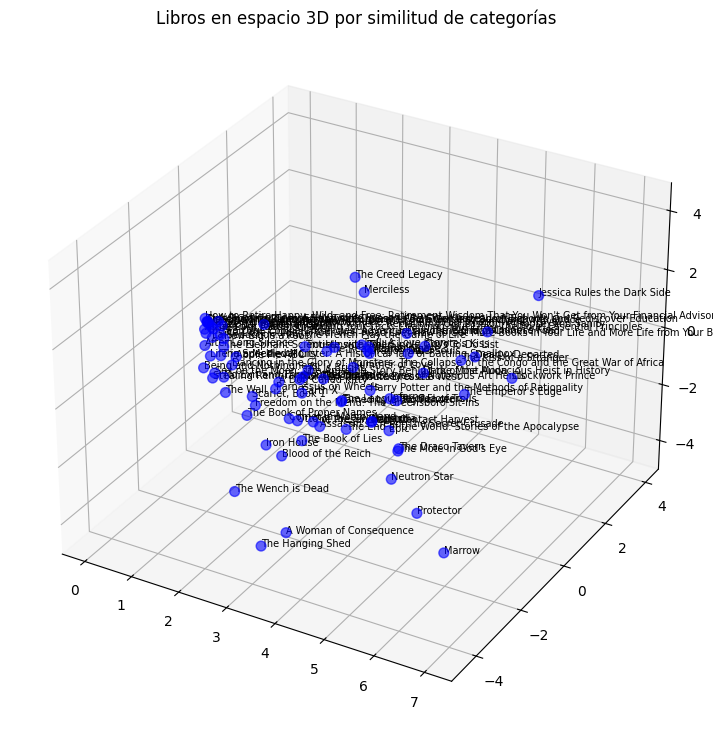

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# --- Vectorización ---
count = CountVectorizer(stop_words='english')
dataset['genre'] = dataset['genre'].fillna('')
count_matrix = count.fit_transform(dataset['genre'])

# --- Reducción a 3D ---
svd = TruncatedSVD(n_components=3)
coords = svd.fit_transform(count_matrix)

# --- Seleccionar solo los primeros 80 libros ---
n = 80
titles = dataset['title'].values[:n]
x, y, z = coords[:n, 0], coords[:n, 1], coords[:n, 2]

# --- Plot en 3D ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', s=50, alpha=0.6)

# Etiquetas encima de cada punto
for i in range(n):
    ax.text(x[i], y[i], z[i], titles[i], size=7, zorder=1)

ax.set_title("Libros en espacio 3D por similitud de categorías")
plt.show()

---
## 4.2. Estudio del Error

En el campo de los sistemas de recomendación, la evaluación del error es un desafío particular, ya que no se cuenta con métricas directas y universales como en problemas de clasificación. Durante el desarrollo del proyecto, hemos estudiado diversas técnicas de evaluación para recomendadores, y a continuación, presentamos un resumen de estas metodologías.

### Evaluación Offline

En un primer enfoque, se pueden utilizar evaluaciones offline, que consisten en dividir el dataset en conjuntos de entrenamiento y prueba. Aunque esta metodología es común en tareas de clasificación, en sistemas de recomendación se adaptan métricas específicas, tales como:

- **Hit Rate y Precision@K:** Miden la frecuencia con la que los ítems recomendados incluyen aquellos que el usuario ha consumido o valorado positivamente.
- **NDCG (Normalized Discounted Cumulative Gain):** Valora la posición de los ítems relevantes en la lista de recomendaciones, penalizando aquellos que aparecen en posiciones inferiores.
- **MAP (Mean Average Precision):** Proporciona una medida global de la precisión, considerando la relevancia de las recomendaciones en distintos niveles.

Estas métricas ofrecen una valoración cuantitativa de la calidad del sistema sin requerir pruebas en un entorno en vivo.

### A/B Testing

En este método, se presentan diferentes versiones del recomendador a distintos grupos de usuarios y se comparan sus rendimientos basados en métricas reales, como:

- **Tasa de Conversión:** Proporción de usuarios que realizan una acción deseada, por ejemplo, seleccionar un libro recomendado.
- **Tiempo de Interacción:** Duración de la sesión o tiempo dedicado a explorar las recomendaciones.
- **Feedback Directo:** Valoraciones o comentarios proporcionados por los usuarios sobre la utilidad de las recomendaciones.

El A/B testing permite validar en condiciones reales cómo interactúan los usuarios con el sistema y ajustar, en consecuencia, parámetros o estrategias de recomendación.

### Feedback en Tiempo Real y Modelos de Reinforcement Learning

Otra línea de investigación que hemos estudiado es el uso del feedback en tiempo real, el cual busca adaptar las recomendaciones en función de la interacción inmediata del usuario. Este enfoque puede incluir técnicas de **reinforcement learning**, donde el sistema aprende a optimizar sus sugerencias basándose en recompensas derivadas de comportamientos como clicks o conversiones. Esta técnica muestra un potencial elevado para mejorar la personalización y actualmente se encuentra en una fase exploratoria para muchos escenarios de recomendación.

### Consideraciones Finales

Si bien hemos investigado estas técnicas de evaluación para sistemas de recomendación, un análisis exhaustivo del error en este contexto resulta complejo y se escapa del alcance de este trabajo. Por ello, hemos decidido enfocar nuestro estudio del error en el clasificador basado en LSTM, donde contamos con métricas claras como precisión y pérdida.

En resumen, hemos estudiado metodologías como la evaluación offline, A/B testing y el feedback en tiempo real para mejorar la calidad de los recomendadores. Sin embargo, dado que estas técnicas requieren un enfoque más profundo y específico, las consideramos líneas de investigación futuras para perfeccionar nuestros sistemas de recomendación.